# Figure 1

This notebooks focus on reproducing figure 1 of the paper "Deep learning the collisional cross sections of the peptide universe from a million experimental values "

## Preliminars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [32]:
df = pd.read_csv('SourceData_Figure_1.csv')

## Figure 1 e

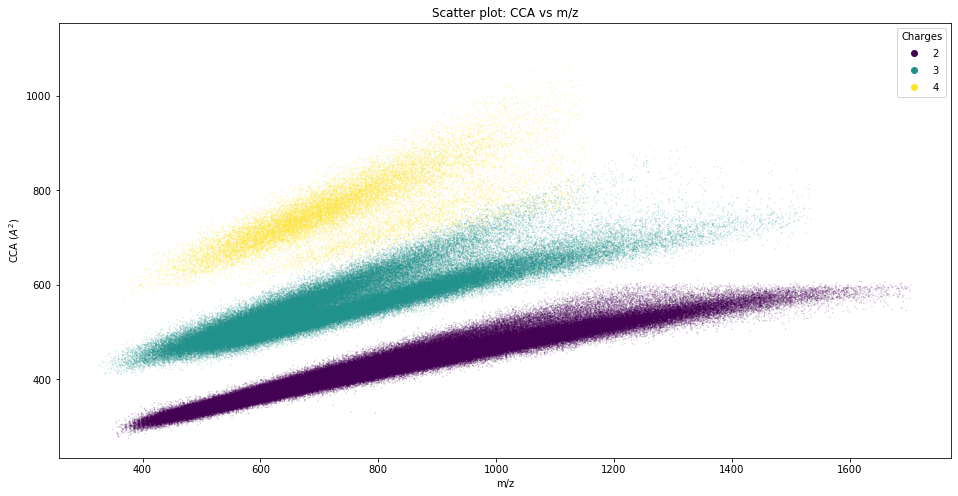

In [3]:
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df['m/z'], df['CCS'], c = df['Charge'], s = 0.01)
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCA vs m/z')
plt.legend(*scatter.legend_elements(), title = 'Charges')

## Supplementary Figure 2
Distribution of tryptic peptides in the m/z vs CCS space. Fitted power Law(A*x^b). Residual histograms are also plotted

In [22]:
df['Experiment'].unique()

array(['HeLa_LysN', 'HeLa_Trypsin_1', 'Yeast_LysC', 'HeLa_Trp_2',
       'Drosophila_LysC', 'Drosophila_Trp', 'HeLa_LysC', 'CElegans_Tryp',
       'Drosophila_LysN', 'Yeast_LysN', 'Yeast_Trypsin', 'Ecoli_LysC',
       'Ecoli_LysN', 'Ecoli_trypsin'], dtype=object)

In [5]:
df_tryp = df[df['Experiment'].apply(lambda x : x.find('_Tr') != -1 or x.find('_tr') != -1)]

In [6]:
f"There is approximately {np.round(df_tryp.shape[0]/df.shape[0], 3)*100}% of tryptic peptides"

'There is approximately 62.7% of tryptic peptides'

In [7]:
f = lambda x, A, b: A*x**b 

In [8]:
x_ch2 = df_tryp['m/z'].values
y_ch2 = df_tryp['CCS'].values
(A_ch1, b_ch1), cov_ch1 = scipy.optimize.curve_fit(f, x_ch2, y_ch2)

In [9]:
df_tryp_ch2 = df_tryp[df['Charge']==2]
df_tryp_ch3 = df_tryp[df['Charge']==3]
df_tryp_ch4 = df_tryp[df['Charge']==4]

/Users/jlrestrepol/miniconda2/envs/ccs/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/jlrestrepol/miniconda2/envs/ccs/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jlrestrepol/miniconda2/envs/ccs/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
popt_2, _ = scipy.optimize.curve_fit(f, df_tryp_ch2['m/z'], df_tryp_ch2['CCS'])
popt_3, _ = scipy.optimize.curve_fit(f, df_tryp_ch3['m/z'], df_tryp_ch3['CCS'])
popt_4, _ = scipy.optimize.curve_fit(f, df_tryp_ch4['m/z'], df_tryp_ch4['CCS'])

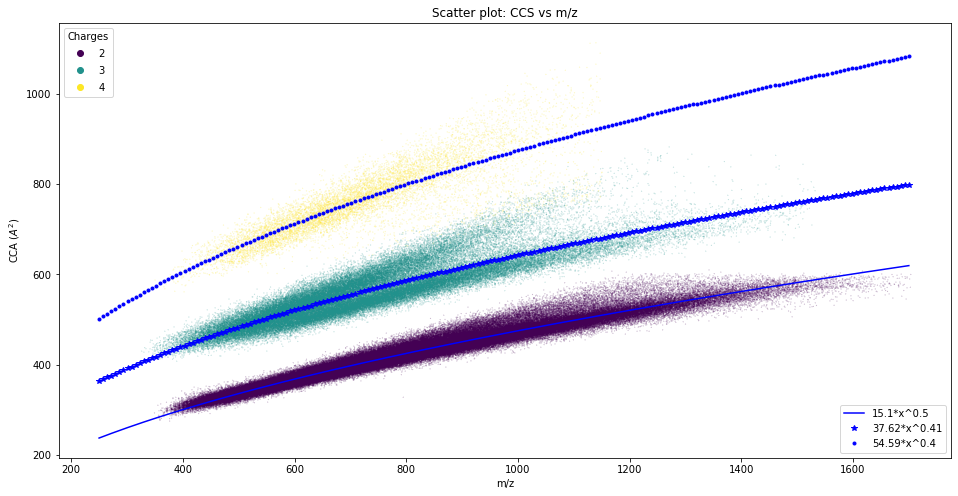

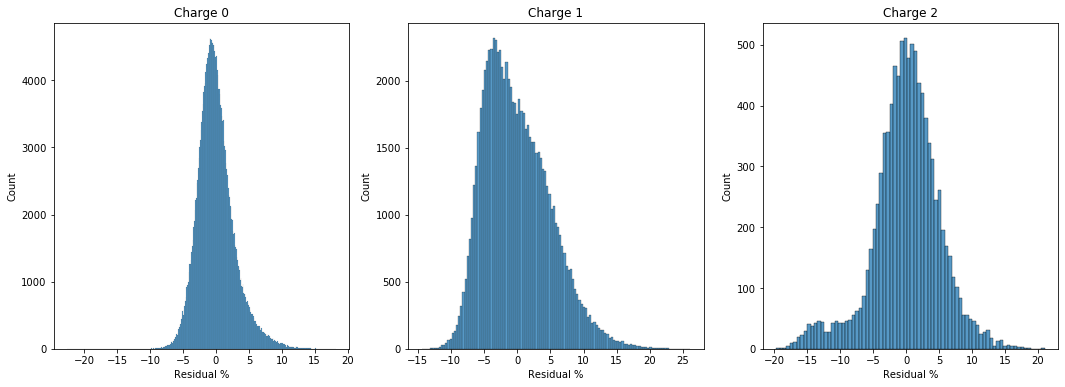

In [11]:
x_plot = np.linspace(250, 1700, 200)
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df_tryp['m/z'], df_tryp['CCS'], c = df_tryp['Charge'], s = 0.01)
power2, = plt.plot(x_plot, f(x_plot, popt_2[0], popt_2[1]) , 'b-', label = 'fit charge 2')
power3, = plt.plot(x_plot, f(x_plot, popt_3[0], popt_3[1]) , 'b*', label = 'fit charge 3')
power4, = plt.plot(x_plot, f(x_plot, popt_4[0], popt_4[1]) , 'b.', label = 'fit charge 4')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
legend1 = plt.legend(*scatter.legend_elements(), title = 'Charges')
legend2 = plt.legend([power2, power3, power4], 
[f'{np.round(popt[0], 2)}*x^{np.round(popt[1], 2)}' for popt in [popt_2, popt_3, popt_4]], loc = 4)
plt.gca().add_artist(legend1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_ch, popt in zip(ax, [df_tryp_ch2, df_tryp_ch3, df_tryp_ch4],[popt_2, popt_3, popt_4]):
    sns.histplot((df_ch['CCS']-f(df_ch['m/z'], popt[0], popt[1]))/f(df_ch['m/z'], popt[0], popt[1])*100, ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

## Question: How would it look like for all the datapoints?

In [25]:
df_ch2 = df[df['Charge']==2]
df_ch3 = df[df['Charge']==3]
df_ch4 = df[df['Charge']==4]

In [27]:
popt_2, _ =scipy.optimize.curve_fit(f, df_ch2['m/z'], df_ch2['CCS'])
popt_3, _ =scipy.optimize.curve_fit(f, df_ch3['m/z'], df_ch3['CCS'])
popt_4, _ =scipy.optimize.curve_fit(f, df_ch4['m/z'], df_ch4['CCS'])

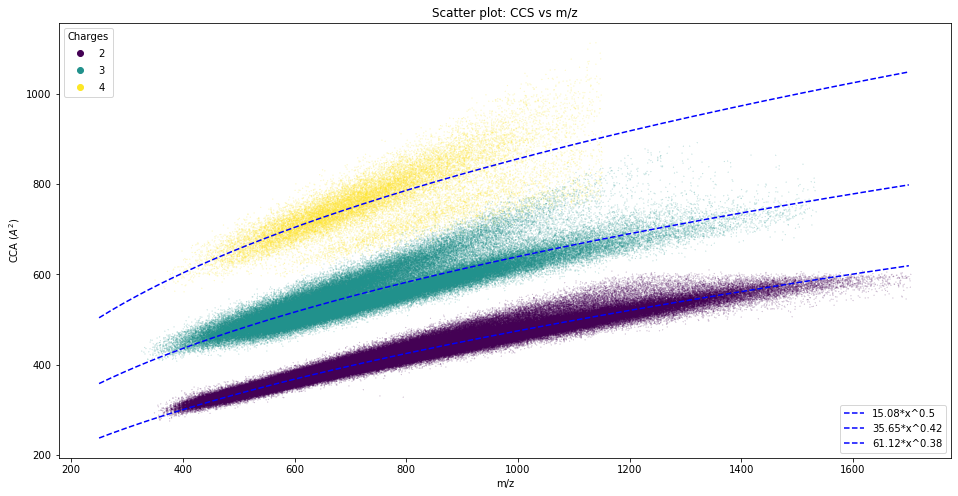

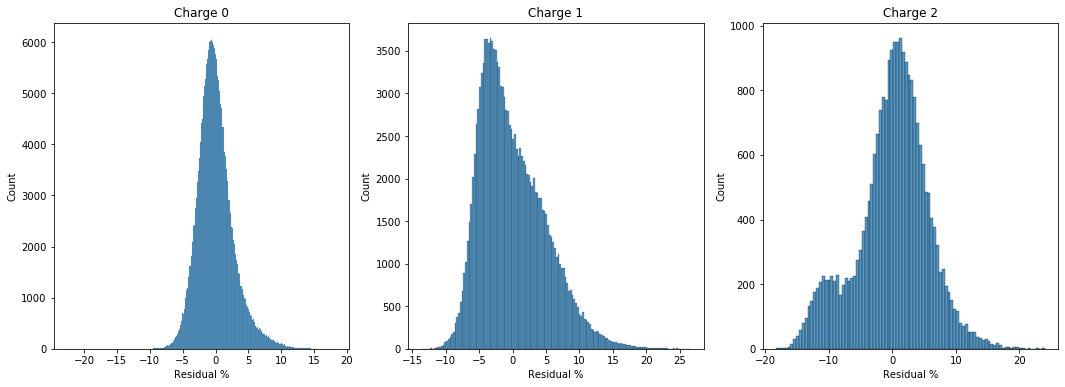

In [38]:
x_plot = np.linspace(250, 1700, 200)
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df['m/z'], df['CCS'], c = df['Charge'], s = 0.01)
power2, = plt.plot(x_plot, f(x_plot, popt_2[0], popt_2[1]) , 'b--', label = 'fit charge 2')
power3, = plt.plot(x_plot, f(x_plot, popt_3[0], popt_3[1]) , 'b--', label = 'fit charge 3')
power4, = plt.plot(x_plot, f(x_plot, popt_4[0], popt_4[1]) , 'b--', label = 'fit charge 4')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
#plt.legend(*scatter.legend_elements(), title = 'Charges')
legend1 = plt.legend(*scatter.legend_elements(), title = 'Charges')
legend2 = plt.legend([power2, power3, power4], 
[f'{np.round(popt[0], 2)}*x^{np.round(popt[1], 2)}' for popt in [popt_2, popt_3, popt_4]], loc = 4)
plt.gca().add_artist(legend1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df_it, popt in zip(ax, [df_ch2, df_ch3, df_ch4],[popt_2, popt_3, popt_4]):
    sns.histplot((df_it['CCS']-f(df_it['m/z'], popt[0], popt[1]))/f(df_it['m/z'], popt[0], popt[1])*100, ax = ax)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

Looks very simlar to before

# Figure 4 

In [41]:
df_fig4 = pd.read_csv('./SourceData_Figure_4.csv', index_col = 0)

In [44]:
df_fig4

,CCS,label Prediction 0,Charge,Modified_sequence
559979,481.229250,497.67060,2,_(ac)AAAAAAAAEQQSSNGPVKK_
559981,782.935200,767.15700,3,_(ac)AAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGAR_
559982,480.424070,481.94410,2,_(ac)AAAAAETPEVLRECGCK_
559986,442.912750,455.39996,2,_(ac)AAAAGDGTVKPLQSAM(ox)K_
559997,448.690400,455.96323,2,_(ac)AAFGLLSYEQRPLK_
...,...,...,...,...
773826,537.296900,539.97705,3,_YYYVCQYCPAGNNM(ox)NRK_
773827,461.667140,462.08173,2,_YYYVCQYCPAGNNM(ox)NR_
773828,459.721175,467.79132,2,_YYYVCQYCPAGNWANR_
773829,580.297060,579.46730,3,_YYYVQNVYTPVDEHVYPDHR_


In [53]:
fig = plt.gcf()
fig.set_size_inches((16, 8))
scatter = plt.scatter(df['m/z'], df['CCS'], c = df['Charge'], s = 0.01)
power2 = plt.plot(x_plot, f(x_plot, popt_2[0], popt_2[1]) , 'b--', label = 'fit charge 2')
power3 = plt.plot(x_plot, f(x_plot, popt_3[0], popt_3[1]) , 'b--', label = 'fit charge 3')
power4 = plt.plot(x_plot, f(x_plot, popt_4[0], popt_4[1]) , 'b--', label = 'fit charge 4')
plt.xlabel('m/z')
plt.ylabel(r'CCA ($A^2$)')
plt.title('Scatter plot: CCS vs m/z')
plt.legend(*scatter.legend_elements(), title = 'Charges')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
i = 0
for ax, df, popt in zip(ax, [df_ch2, df_ch3, df_ch4],[popt_2, popt_3, popt_4]):
    ax.hist((df['CCS']-f(df['m/z'], popt[0], popt[1]))/f(df['m/z'], popt[0], popt[1])*100, bins = 100)
    ax.set_xlabel('Residual %')
    ax.set_ylabel('Count')
    ax.set_title(f'Charge {i}')
    i += 1

KeyError: 'm/z'

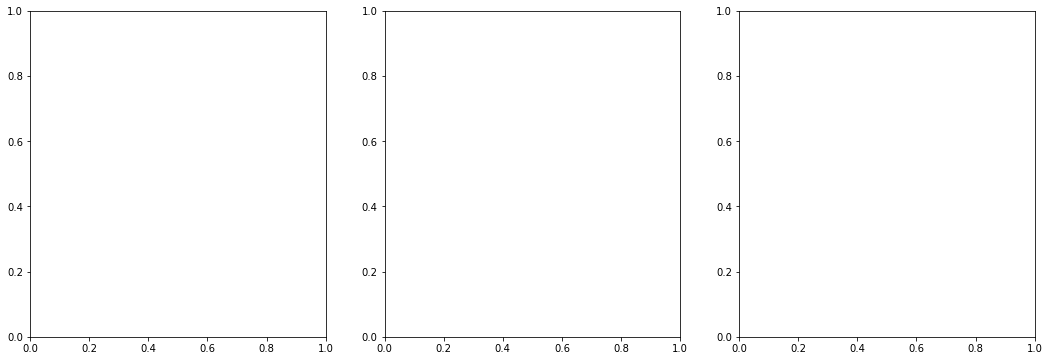

In [55]:
df_fig4

,CCS,label Prediction 0,Charge,Modified_sequence
559979,481.229250,497.67060,2,_(ac)AAAAAAAAEQQSSNGPVKK_
559981,782.935200,767.15700,3,_(ac)AAAAAAVGPGAGGAGSAVPGGAGPCATVSVFPGAR_
559982,480.424070,481.94410,2,_(ac)AAAAAETPEVLRECGCK_
559986,442.912750,455.39996,2,_(ac)AAAAGDGTVKPLQSAM(ox)K_
559997,448.690400,455.96323,2,_(ac)AAFGLLSYEQRPLK_
...,...,...,...,...
773826,537.296900,539.97705,3,_YYYVCQYCPAGNNM(ox)NRK_
773827,461.667140,462.08173,2,_YYYVCQYCPAGNNM(ox)NR_
773828,459.721175,467.79132,2,_YYYVCQYCPAGNWANR_
773829,580.297060,579.46730,3,_YYYVQNVYTPVDEHVYPDHR_
